In [5]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Function to create an 8x8 image from a row of 64 binary values
def row_to_image(row, output_path):
    # Convert the row to a numpy array and reshape to 8x8
    pixel_data = np.array(row, dtype=np.uint8).reshape(8, 8)
    # Scale binary values (0, 1) to grayscale (0, 255)
    pixel_data = pixel_data * 255
    # Create an image from the array
    image = Image.fromarray(pixel_data, mode='L')  # 'L' for grayscale
    # Save the image
    image.save(output_path)

# Main script
def process_csv_to_images(csv_file, output_dir='F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images'):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Read the CSV file
    df = pd.read_csv(csv_file, header=None)  # Assuming no header in CSV
    # Ensure the CSV has 64 columns
    if df.shape[1] != 64:
        raise ValueError(f"Expected 64 columns, but got {df.shape[1]}")
    
    # Process each row, naming images from 1 to number of rows
    for idx, row in df.iterrows():
        # Use idx + 1 for naming (1 to 1500)
        output_path = os.path.join(output_dir, f'image_{idx + 1}.png')
        row_to_image(row, output_path)
        print(f'Saved image for row {idx} to {output_path}')

# Example usage
csv_file = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/binary_matrices.csv'  # Replace with your CSV file path
process_csv_to_images(csv_file)

Saved image for row 0 to F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images\image_1.png
Saved image for row 1 to F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images\image_2.png
Saved image for row 2 to F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images\image_3.png
Saved image for row 3 to F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images\image_4.png
Saved image for row 4 to F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images\image_5.png
Saved image for row 5 to F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images\image_6.png
Saved image for row 6 to F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images\image_7.png
Saved image for row 7 to F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images\image_8.png
Saved image for row 8 to F:/Education/NSU/CSE/CSE499/Imp

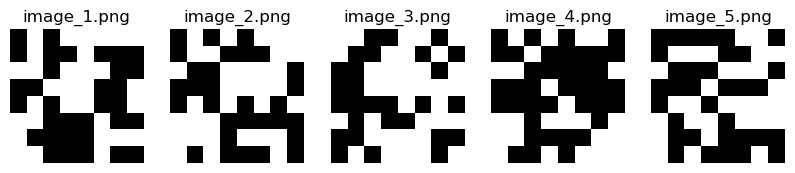

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Directory where images are saved
image_dir = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/images'

# List of sample image names to display
image_names = ['image_1.png', 'image_2.png', 'image_3.png', 'image_4.png', 'image_5.png']

# Display images
plt.figure(figsize=(10, 5))  # Set figure size
for i, image_name in enumerate(image_names, 1):
    image_path = os.path.join(image_dir, image_name)
    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.subplot(1, 5, i)
        plt.imshow(img, cmap='gray')
        plt.title(image_name)
        plt.axis('off')
    else:
        print(f"Image {image_path} not found")
plt.show()

In [19]:
import pandas as pd
import os
import numpy as np

def get_file_shape(file_path):
    try:
        # Read the text file, skipping the first 3 lines
        df = pd.read_csv(file_path, sep='\t', skiprows=3, header=None)
        return df.shape, None
    except Exception as e:
        return None, str(e)

def check_all_shapes(input_folder):
    shapes = {}
    print(f"Listing files in {input_folder}...")
    all_files = os.listdir(input_folder)
    txt_files = [f for f in all_files if f.startswith('sp') and f.endswith('.txt')]
    print(f"Found {len(txt_files)} text files: {txt_files[:5]}...")  # Show first 5 for brevity
    
    for file_id in range(1, 601):
        file_name = f'sp{file_id}.txt'
        file_path = os.path.join(input_folder, file_name)
        
        if not os.path.exists(file_path):
            shapes[file_name] = "File not found"
            continue
        
        shape, error = get_file_shape(file_path)
        if shape is None:
            shapes[file_name] = f"Error: {error}"
        else:
            shapes[file_name] = shape
    
    # Print all shapes
    print("\nShapes of files:")
    for file_name, shape in shapes.items():
        print(f"{file_name}: {shape}")
    
    # Get valid shapes
    valid_shapes = [s for s in shapes.values() if isinstance(s, tuple)]
    if not valid_shapes:
        raise ValueError("No valid files found to determine shape.")
    
    # Check for consistent shapes
    unique_shapes = set(valid_shapes)
    if len(unique_shapes) > 1:
        print("Warning: Files have different shapes. Using the most common shape.")
        # Find the most common shape
        shape_counts = {}
        for shape in valid_shapes:
            shape_counts[shape] = shape_counts.get(shape, 0) + 1
        common_shape = max(shape_counts, key=shape_counts.get)
        print(f"Most common shape: {common_shape}")
        return common_shape, shapes
    else:
        common_shape = valid_shapes[0]
        print(f"All valid files have consistent shape: {common_shape}")
        return common_shape, shapes

def process_text_file(file_path, file_id, expected_rows):
    # Read the text file, skipping the first 3 lines
    df = pd.read_csv(file_path, sep='\t', skiprows=3, header=None)
    
    # Validate column count
    if df.shape[1] != 3:
        raise ValueError(f"File {file_path} has unexpected number of columns: {df.shape[1]}")
    
    # Validate row count
    if df.shape[0] != expected_rows:
        raise ValueError(f"File {file_path} has unexpected number of rows: {df.shape[0]}, expected {expected_rows}")
    
    # Extract the 2nd (real) and 3rd (imaginary) columns
    real_part = df.iloc[:, 1].values
    imag_part = df.iloc[:, 2].values
    
    # Combine into a single row: [file_id, real_part, imag_part]
    row = np.concatenate([[file_id], real_part, imag_part])
    return row

def combine_files_to_csv(input_folder, output_csv_path):
    # Create output directory if it doesn't exist
    output_dir = os.path.dirname(output_csv_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Step 1: Check shapes of all files
    print("Checking file shapes...")
    common_shape, shapes_dict = check_all_shapes(input_folder)
    expected_rows = common_shape[0]
    
    # Step 2: Process files sp1.txt to sp600.txt
    all_rows = []
    for file_id in range(1, 601):
        file_name = f'sp{file_id}.txt'
        file_path = os.path.join(input_folder, file_name)
        
        if not os.path.exists(file_path):
            print(f"Warning: File {file_path} not found, skipping...")
            continue
        
        # Check if the file has the expected shape
        shape = shapes_dict.get(file_name)
        if not isinstance(shape, tuple):
            print(f"Skipping {file_name}: {shape}")
            continue
        if shape[0] != expected_rows:
            print(f"Skipping {file_name}: Row count {shape[0]} does not match expected {expected_rows}")
            continue
        
        print(f"Processing {file_name}...")
        try:
            row = process_text_file(file_path, file_id, expected_rows)
            all_rows.append(row)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            continue
    
    if not all_rows:
        raise ValueError("No valid files were processed. Cannot create CSV.")
    
    # Create column names: ID, real_1 to real_N, imag_1 to imag_N
    columns = ['ID'] + [f'real_{i+1}' for i in range(expected_rows)] + [f'imag_{i+1}' for i in range(expected_rows)]
    
    # Create DataFrame
    result_df = pd.DataFrame(all_rows, columns=columns)
    
    # Save to CSV
    result_df.to_csv(output_csv_path, index=False)
    print(f"Saved combined data to {output_csv_path} with {len(all_rows)} rows and {len(columns)} columns")

# Example usage
input_folder = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter'
output_csv_path = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/parameter.csv'
combine_files_to_csv(input_folder, output_csv_path)

Checking file shapes...
Listing files in F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter...
Found 600 text files: ['sp1.txt', 'sp10.txt', 'sp100.txt', 'sp101.txt', 'sp102.txt']...

Shapes of files:
sp1.txt: (1002, 3)
sp2.txt: (1002, 3)
sp3.txt: (1002, 3)
sp4.txt: (1002, 3)
sp5.txt: (1002, 3)
sp6.txt: (1002, 3)
sp7.txt: (1002, 3)
sp8.txt: (1002, 3)
sp9.txt: (1002, 3)
sp10.txt: (1004, 3)
sp11.txt: (1004, 3)
sp12.txt: (1004, 3)
sp13.txt: (1002, 3)
sp14.txt: (1004, 3)
sp15.txt: (1004, 3)
sp16.txt: (1004, 3)
sp17.txt: (1004, 3)
sp18.txt: (1002, 3)
sp19.txt: (1002, 3)
sp20.txt: (1002, 3)
sp21.txt: (1004, 3)
sp22.txt: (1035, 3)
sp23.txt: (1002, 3)
sp24.txt: (1002, 3)
sp25.txt: (1002, 3)
sp26.txt: (1002, 3)
sp27.txt: (1004, 3)
sp28.txt: (1004, 3)
sp29.txt: (1004, 3)
sp30.txt: (1002, 3)
sp31.txt: (1004, 3)
sp32.txt: (1002, 3)
sp33.txt: (1004, 3)
sp34.txt: (1002, 3)
sp35.txt: (1004, 3)
sp36.txt: (1004, 3)
sp37.txt: (1002, 3)
sp38.txt: (1004, 3)
sp39.txt: (10

In [20]:
import pandas as pd
import os
import numpy as np

def get_file_shape(file_path):
    try:
        df = pd.read_csv(file_path, sep='\t', skiprows=3, header=None)
        return df.shape, None
    except Exception as e:
        return None, str(e)

def process_text_file(file_path, file_id, expected_rows=1002):
    df = pd.read_csv(file_path, sep='\t', skiprows=3, header=None)
    
    if df.shape[1] != 3:
        raise ValueError(f"File {file_path} has unexpected number of columns: {df.shape[1]}")
    
    current_rows = df.shape[0]
    if current_rows < expected_rows:
        raise ValueError(f"File {file_path} has {current_rows} rows, expected at least {expected_rows}")
    
    # Take only the first 1002 rows if more are present
    if current_rows > expected_rows:
        print(f"Truncating {file_path} from {current_rows} to {expected_rows} rows")
        df = df.iloc[:expected_rows, :]
    
    real_part = df.iloc[:, 1].values
    imag_part = df.iloc[:, 2].values
    
    return np.concatenate([[file_id], real_part, imag_part])

def combine_files_to_csv(input_folder, output_csv_path, expected_rows=1002):
    output_dir = os.path.dirname(output_csv_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    print("Checking file shapes...")
    all_rows = []
    columns = ['ID'] + [f'real_{i+1}' for i in range(expected_rows)] + [f'imag_{i+1}' for i in range(expected_rows)]
    
    # Try processing sp1.txt first
    first_file = 'sp1.txt'
    first_file_path = os.path.join(input_folder, first_file)
    if os.path.exists(first_file_path):
        print(f"Processing {first_file} as first row...")
        try:
            row = process_text_file(first_file_path, 1, expected_rows)
            all_rows.append(row)
        except Exception as e:
            print(f"Error processing {first_file}: {e}")
    else:
        print(f"Warning: {first_file} not found, proceeding with other files...")
    
    # Process remaining files (sp2.txt to sp600.txt)
    for file_id in range(2, 601):
        file_name = f'sp{file_id}.txt'
        file_path = os.path.join(input_folder, file_name)
        
        if not os.path.exists(file_path):
            print(f"Warning: File {file_path} not found, skipping...")
            continue
        
        shape, error = get_file_shape(file_path)
        if shape is None:
            print(f"Skipping {file_name}: Error: {error}")
            continue
        
        print(f"Processing {file_name}...")
        try:
            row = process_text_file(file_path, file_id, expected_rows)
            all_rows.append(row)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            continue
    
    if not all_rows:
        raise ValueError("No valid files were processed. Cannot create CSV.")
    
    result_df = pd.DataFrame(all_rows, columns=columns)
    result_df.to_csv(output_csv_path, index=False)
    print(f"Saved combined data to {output_csv_path} with {len(all_rows)} rows and {len(columns)} columns")

# Example usage
input_folder = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter'
output_csv_path = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/parameters.csv'
combine_files_to_csv(input_folder, output_csv_path, expected_rows=1002)

Checking file shapes...
Processing sp1.txt as first row...
Processing sp2.txt...
Processing sp3.txt...
Processing sp4.txt...
Processing sp5.txt...
Processing sp6.txt...
Processing sp7.txt...
Processing sp8.txt...
Processing sp9.txt...
Processing sp10.txt...
Truncating F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter\sp10.txt from 1004 to 1002 rows
Processing sp11.txt...
Truncating F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter\sp11.txt from 1004 to 1002 rows
Processing sp12.txt...
Truncating F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter\sp12.txt from 1004 to 1002 rows
Processing sp13.txt...
Processing sp14.txt...
Truncating F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter\sp14.txt from 1004 to 1002 rows
Processing sp15.txt...
Truncating F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter\sp15.txt from 

In [23]:
import pandas as pd
import os
import numpy as np

def get_file_shape(file_path):
    try:
        df = pd.read_csv(file_path, sep='\t', skiprows=3, header=None)
        return df.shape, None
    except Exception as e:
        return None, str(e)

def get_reference_frequencies(file_path, expected_rows=1002):
    try:
        df = pd.read_csv(file_path, sep='\t', skiprows=3, header=None)
        if df.shape[1] != 3:
            raise ValueError(f"Reference file {file_path} has unexpected number of columns: {df.shape[1]}")
        if df.shape[0] != expected_rows:
            raise ValueError(f"Reference file {file_path} has {df.shape[0]} rows, expected {expected_rows}")
        return df.iloc[:, 0].values, None
    except Exception as e:
        return None, str(e)

def process_text_file(file_path, file_id, ref_frequencies, expected_rows=1002, tolerance=1e-6):
    df = pd.read_csv(file_path, sep='\t', skiprows=3, header=None)
    
    if df.shape[1] != 3:
        raise ValueError(f"File {file_path} has unexpected number of columns: {df.shape[1]}")
    
    current_rows = df.shape[0]
    if current_rows < expected_rows:
        raise ValueError(f"File {file_path} has {current_rows} rows, expected at least {expected_rows}")
    
    # Get frequencies from the current file
    file_frequencies = df.iloc[:, 0].values
    
    # Find matching rows by comparing frequencies
    matched_indices = []
    for ref_freq in ref_frequencies:
        # Find the index of the closest frequency in the current file
        differences = np.abs(file_frequencies - ref_freq)
        closest_idx = np.argmin(differences)
        if differences[closest_idx] <= tolerance:
            matched_indices.append(closest_idx)
        else:
            raise ValueError(f"File {file_path} has no frequency close to {ref_freq} within tolerance {tolerance}")
    
    # Ensure we have exactly 1002 unique matching rows
    matched_indices = sorted(list(set(matched_indices)))
    if len(matched_indices) != expected_rows:
        raise ValueError(f"File {file_path} matched {len(matched_indices)} rows, expected {expected_rows}")
    
    # Identify skipped rows (those not in matched_indices)
    all_indices = set(range(current_rows))
    skipped_indices = sorted(list(all_indices - set(matched_indices)))
    if skipped_indices:
        print(f"Truncating {file_path} from {current_rows} to {expected_rows} rows, skipping rows {skipped_indices}")
    
    # Use only the matched rows
    df = df.iloc[matched_indices, :]
    real_part = df.iloc[:, 1].values
    imag_part = df.iloc[:, 2].values
    
    return np.concatenate([[file_id], real_part, imag_part])

def combine_files_to_csv(input_folder, output_csv_path, expected_rows=1002):
    output_dir = os.path.dirname(output_csv_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    print("Checking file shapes...")
    shapes_dict = {}
    all_files = os.listdir(input_folder)
    txt_files = [f for f in all_files if f.startswith('sp') and f.endswith('.txt')]
    print(f"Found {len(txt_files)} text files: {txt_files[:5]}...")
    
    for file_id in range(1, 601):
        file_name = f'sp{file_id}.txt'
        file_path = os.path.join(input_folder, file_name)
        
        if not os.path.exists(file_path):
            shapes_dict[file_name] = "File not found"
            continue
        
        shape, error = get_file_shape(file_path)
        if shape is None:
            shapes_dict[file_name] = f"Error: {error}"
        else:
            shapes_dict[file_name] = shape
    
    print("\nShapes of files:")
    for file_name, shape in shapes_dict.items():
        print(f"{file_name}: {shape}")
    
    # Get reference frequencies from sp1.txt
    ref_file = 'sp1.txt'
    ref_file_path = os.path.join(input_folder, ref_file)
    if not os.path.exists(ref_file_path):
        raise ValueError(f"Reference file {ref_file_path} not found")
    
    ref_frequencies, error = get_reference_frequencies(ref_file_path, expected_rows)
    if ref_frequencies is None:
        raise ValueError(f"Error reading reference file {ref_file_path}: {error}")
    
    columns = ['ID'] + [f'real_{i+1}' for i in range(expected_rows)] + [f'imag_{i+1}' for i in range(expected_rows)]
    all_rows = []
    
    # Process sp1.txt first
    print(f"\nProcessing {ref_file} as first row...")
    try:
        row = process_text_file(ref_file_path, 1, ref_frequencies, expected_rows)
        all_rows.append(row)
    except Exception as e:
        print(f"Error processing {ref_file}: {e}")
        raise ValueError(f"Cannot proceed without valid reference file {ref_file}")
    
    # Process remaining files (sp2.txt to sp600.txt)
    for file_id in range(2, 601):
        file_name = f'sp{file_id}.txt'
        file_path = os.path.join(input_folder, file_name)
        
        if not os.path.exists(file_path):
            print(f"Warning: File {file_path} not found, skipping...")
            continue
        
        print(f"Processing {file_name}...")
        try:
            row = process_text_file(file_path, file_id, ref_frequencies, expected_rows)
            all_rows.append(row)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            continue
    
    if not all_rows:
        raise ValueError("No valid files were processed. Cannot create CSV.")
    
    result_df = pd.DataFrame(all_rows, columns=columns)
    result_df.to_csv(output_csv_path, index=False)
    print(f"\nSaved combined data to {output_csv_path} with {len(all_rows)} rows and {len(columns)} columns")

# Example usage
input_folder = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter'
output_csv_path = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/parameter1.csv'
combine_files_to_csv(input_folder, output_csv_path, expected_rows=1002)

Checking file shapes...
Found 600 text files: ['sp1.txt', 'sp10.txt', 'sp100.txt', 'sp101.txt', 'sp102.txt']...

Shapes of files:
sp1.txt: (1002, 3)
sp2.txt: (1002, 3)
sp3.txt: (1002, 3)
sp4.txt: (1002, 3)
sp5.txt: (1002, 3)
sp6.txt: (1002, 3)
sp7.txt: (1002, 3)
sp8.txt: (1002, 3)
sp9.txt: (1002, 3)
sp10.txt: (1004, 3)
sp11.txt: (1004, 3)
sp12.txt: (1004, 3)
sp13.txt: (1002, 3)
sp14.txt: (1004, 3)
sp15.txt: (1004, 3)
sp16.txt: (1004, 3)
sp17.txt: (1004, 3)
sp18.txt: (1002, 3)
sp19.txt: (1002, 3)
sp20.txt: (1002, 3)
sp21.txt: (1004, 3)
sp22.txt: (1035, 3)
sp23.txt: (1002, 3)
sp24.txt: (1002, 3)
sp25.txt: (1002, 3)
sp26.txt: (1002, 3)
sp27.txt: (1004, 3)
sp28.txt: (1004, 3)
sp29.txt: (1004, 3)
sp30.txt: (1002, 3)
sp31.txt: (1004, 3)
sp32.txt: (1002, 3)
sp33.txt: (1004, 3)
sp34.txt: (1002, 3)
sp35.txt: (1004, 3)
sp36.txt: (1004, 3)
sp37.txt: (1002, 3)
sp38.txt: (1004, 3)
sp39.txt: (1002, 3)
sp40.txt: (1002, 3)
sp41.txt: (1002, 3)
sp42.txt: (1002, 3)
sp43.txt: (1002, 3)
sp44.txt: (1004, 3)

In [28]:
import os
import csv
import glob

def process_files(input_folder, output_csv):
    # Prepare data structure for all files
    all_results = []
    
    # Get all text files in the input folder and sort them numerically
    file_pattern = os.path.join(input_folder, 'sp*.txt')
    files = sorted(glob.glob(file_pattern), key=lambda x: int(os.path.basename(x)[2:-4]))
    
    for file_path in files:
        # Extract ID from filename (spX.txt -> X)
        file_name = os.path.basename(file_path)
        file_id = int(file_name[2:-4])
        
        # Initialize variables for this file
        max_col2 = -float('inf')
        min_col2 = float('inf')
        max_col3 = -float('inf')
        min_col3 = float('inf')
        
        col1_at_max_col2 = None
        col1_at_min_col2 = None
        col1_at_max_col3 = None
        col1_at_min_col3 = None
        
        with open(file_path, 'r') as f:
            # Skip the first 3 lines of unusual data
            for _ in range(3):
                next(f)
            
            # Process the remaining data
            for line in f:
                columns = line.strip().split()
                if len(columns) < 3:
                    continue  # Skip lines with less than 3 columns
                
                try:
                    col1 = columns[0]
                    col2 = float(columns[1])
                    col3 = float(columns[2])
                    
                    # Check Column 2
                    if col2 > max_col2:
                        max_col2 = col2
                        col1_at_max_col2 = col1
                    if col2 < min_col2:
                        min_col2 = col2
                        col1_at_min_col2 = col1
                    
                    # Check Column 3
                    if col3 > max_col3:
                        max_col3 = col3
                        col1_at_max_col3 = col1
                    if col3 < min_col3:
                        min_col3 = col3
                        col1_at_min_col3 = col1
                        
                except ValueError:
                    continue  # Skip lines with non-numeric data
        
        # Add results for this file
        all_results.append({
            'ID': file_id,
            'Col1_at_max_Col2': col1_at_max_col2,
            'Max_Col2': max_col2,
            'Col1_at_min_Col2': col1_at_min_col2,
            'Min_Col2': min_col2,
            'Col1_at_max_Col3': col1_at_max_col3,
            'Max_Col3': max_col3,
            'Col1_at_min_Col3': col1_at_min_col3,
            'Min_Col3': min_col3
        })
    
    # Write results to CSV
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = [
            'ID',
            'Col1_at_max_Col2', 'Max_Col2',
            'Col1_at_min_Col2', 'Min_Col2',
            'Col1_at_max_Col3', 'Max_Col3',
            'Col1_at_min_Col3', 'Min_Col3'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        for result in all_results:
            writer.writerow(result)


# Example usage
input_folder = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter'  # Replace with your folder path
output_csv = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter/results.csv'               # Output CSV file name
process_files(input_folder, output_csv)

In [29]:
import os
import glob
import matplotlib.pyplot as plt

def create_graphs(input_folder, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Get all text files sorted numerically
    file_pattern = os.path.join(input_folder, 'sp*.txt')
    files = sorted(glob.glob(file_pattern), key=lambda x: int(os.path.basename(x)[2:-4]))
    
    for file_path in files:
        # Prepare data containers
        x_vals = []
        y_col2 = []
        y_col3 = []
        
        with open(file_path, 'r') as f:
            # Skip first 3 lines
            for _ in range(3):
                next(f)
            
            # Read remaining data
            for line in f:
                columns = line.strip().split()
                if len(columns) >= 3:
                    try:
                        x_vals.append(float(columns[0]))
                        y_col2.append(float(columns[1]))
                        y_col3.append(float(columns[2]))
                    except ValueError:
                        continue
        
        # Create plot
        plt.figure(figsize=(10, 6))
        
        # Plot both lines
        plt.plot(x_vals, y_col2, label='Column 2', color='blue', linewidth=1)
        plt.plot(x_vals, y_col3, label='Column 3', color='red', linewidth=1)
        
        # Add plot details
        filename = os.path.basename(file_path)
        plt.title(f'Data Visualization for {filename}')
        plt.xlabel('Column 1 Values')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Save the plot
        output_path = os.path.join(output_folder, filename.replace('.txt', '.png'))
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        plt.close()
        
        print(f'Created: {output_path}')

# Example usage
input_folder = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/S Parameter'  # Replace with your input folder
output_folder = 'F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs'                  # Folder where images will be saved
create_graphs(input_folder, output_folder)

Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp1.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp2.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp3.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp4.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp5.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp6.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp7.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp8.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp9.png
Created: F:/Education/NSU/CSE/CSE499/Implementation/Dataset/8x8 Matrix Metasurface/graphs\sp10.png
Created: F:/Educati